In [82]:
import pandas as pd #Importamos todas las librerias que vamos a utilizar para nuestra herramienta
import funciones as fn
import visualizaciones as vs
import matplotlib.pyplot as plt
OA_Ak = 'db61d16ed80a943c9b65769aea7b75e8-dec8e1238889457a886b69e85640efec' #Utilizamos nuestro token para descargar los datos de OANDA
OA_In = "EUR_USD"  #Indicamos el instrumento a estudiar
OA_Gn = "D"  
fini = pd.to_datetime("2019-02-01 00:00:00").tz_localize('GMT') #Marcamos los párametros de inicio y fin de la obtención de datos
ffin = pd.to_datetime('today').tz_localize('GMT') 

df_pe = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,
                             p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900)

In [83]:
vs_grafica1 = vs.g_velas(p0_de=df_pe.iloc[0:120, :]) #Graficamos el instrumento en velas para estudiar su comportamiento
#vs_grafica1.show()

In [84]:
#Como queremos utilizar el oscilador estocástico 14 debemos definir algunas cosas en base a eso
df_pe['Low_14'] = df_pe['Low'].rolling(14).min() #Bajos con ventana de 14
df_pe['High_14'] = df_pe['High'].rolling(14).max() #Altos con ventana de 14
close = pd.DataFrame(float(i) for i in df_pe['Close']) #Creación de variables para futuro uso
high14 = pd.DataFrame(float(i) for i in df_pe['High_14'])
low14 = pd.DataFrame(float(i) for i in df_pe['Low_14'])
df_pe['%K'] = 100*((close - low14)) / (high14 - low14) #Tasa actual de mercado para el cambio de divisas
df_pe['%D'] = df_pe['%K'].rolling(window=3).mean() #Promedio de movimiento de 3 periodos para dicha tasa

Text(0.5,1,'Oscillator')

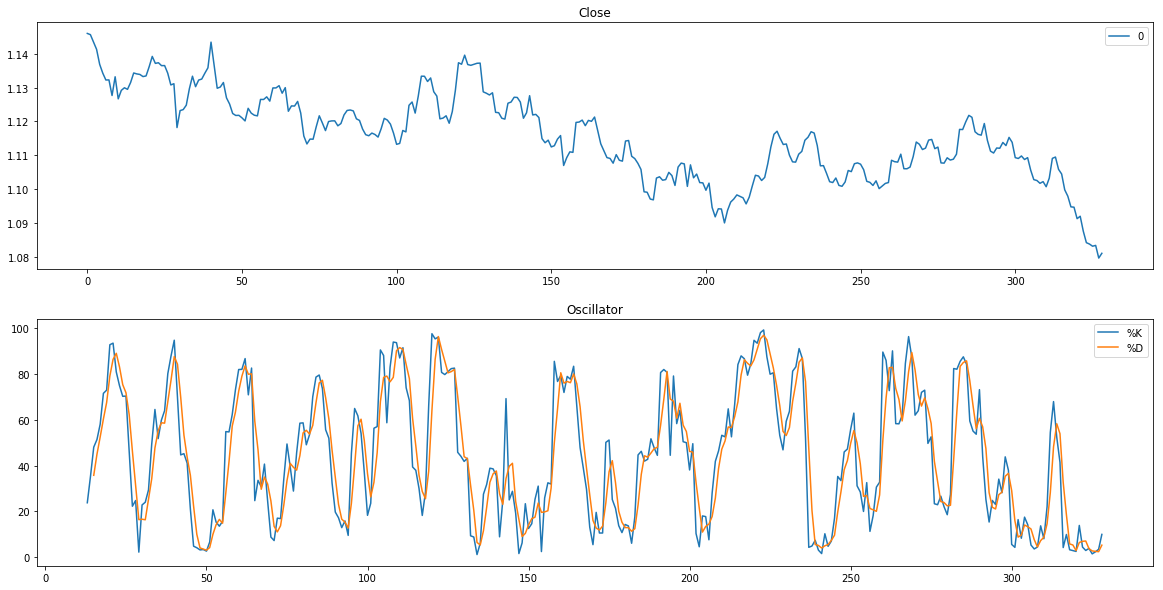

In [85]:
#Graficamos el oscilador estocástico para estudiar las señales
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
close.plot(ax=axes[0]); axes[0].set_title('Close')
df_pe[['%K', '%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')

In [86]:
df_pe['EWMA12'] = df_pe['Close'].ewm(span=12).mean() #Sacamos un EWMA de los closes para estudiar su comportamiento

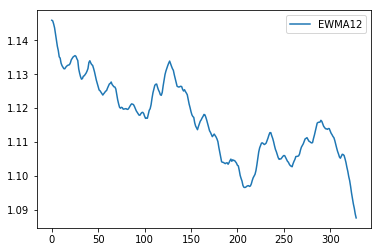

In [87]:
df_pe[['Close','EWMA12']].plot() #Lo graficamos para poder visualizar nuestro análisis

In [89]:
df_pe.describe() #Nos pedimos que nos describa nuestra obtención de datos para la ayuda de toma de decisiones

,Low_14,High_14,%K,%D,EWMA12
count,316.000000,316.000000,316.000000,314.000000,329.000000
mean,1.106680,1.124864,44.274829,44.444254,1.116440
std,0.010862,0.011422,28.800199,26.758917,0.011739
min,1.078220,1.102420,1.072647,2.346211,1.087519
25%,1.098910,1.117080,18.181242,20.729220,1.106258
50%,1.106780,1.123920,43.987160,42.896704,1.115840
75%,1.117640,1.132728,70.089943,67.947238,1.126212
max,1.127560,1.148840,99.308557,96.983529,1.145980
